In [29]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp

### Load Data

In [3]:
proj_path = Path('/home/ekarakoylu/PROJEX/directed_sentiment_nli')
dev_data_path = proj_path / 'data/sentihood/sentihood_dev.json'
train_data_path = proj_path / 'data/sentihood/sentihood_train.json'
test_data_path = proj_path / 'data/sentihood/sentihood_test.json'

In [4]:
assert dev_data_path.exists()
assert train_data_path.exists()
assert test_data_path.exists()

### Clean Data

In [5]:
def clean_dataframe(df):
    dclean = pd.concat(
        (df.explode('opinions')['opinions'].apply(pd.Series), 
        df.drop('opinions', axis=1)),
        axis=1, join='outer').drop(0, axis=1).dropna().reset_index(drop=True)
    return dclean


In [6]:
ddev = pd.read_json(dev_data_path)

In [7]:
ddev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   opinions  747 non-null    object
 1   id        747 non-null    int64 
 2   text      747 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.6+ KB


In [8]:

ddvc = clean_dataframe(ddev)
ddvc.head()

,sentiment,aspect,target_entity,id,text
0,Positive,shopping,LOCATION1,302,LOCATION1 is just a normal area that happens ...
1,Positive,transit-location,LOCATION1,662,", LOCATION1 , LOCATION2 are all good places to..."
2,Positive,transit-location,LOCATION2,662,", LOCATION1 , LOCATION2 are all good places to..."
3,Negative,safety,LOCATION1,292,A Brazilian man was shot there 3 years ago in ...
4,Negative,safety,LOCATION1,78,A friend of mine lived in LOCATION1 and she li...


In [9]:
dtr = pd.read_json(train_data_path)

In [10]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   opinions  2977 non-null   object
 1   id        2977 non-null   int64 
 2   text      2977 non-null   object
dtypes: int64(1), object(2)
memory usage: 69.9+ KB


In [11]:
dtr.head()

,opinions,id,text
0,"[{'sentiment': 'Negative', 'aspect': 'price', ...",1430,LOCATION1 is transforming and the prices w...
1,"[{'sentiment': 'Positive', 'aspect': 'shopping...",2013,Along LOCATION1 there are lots of Electronic...
2,"[{'sentiment': 'Positive', 'aspect': 'transit-...",1244,And LOCATION1 is ten mins direct on the tube...
3,"[{'sentiment': 'Positive', 'aspect': 'nightlif...",209,Another option is LOCATION1 which is very ce...
4,"[{'sentiment': 'Positive', 'aspect': 'general'...",2824,Best bet is around LOCATION2 and LOCATION1 a...


In [12]:
dtrc = clean_dataframe(dtr)

In [13]:
dtrc.head()

,sentiment,aspect,target_entity,id,text
0,Negative,price,LOCATION1,1430,LOCATION1 is transforming and the prices w...
1,Positive,shopping,LOCATION1,2013,Along LOCATION1 there are lots of Electronic...
2,Positive,transit-location,LOCATION1,1244,And LOCATION1 is ten mins direct on the tube...
3,Positive,nightlife,LOCATION1,209,Another option is LOCATION1 which is very ce...
4,Positive,transit-location,LOCATION1,209,Another option is LOCATION1 which is very ce...


In [14]:
dtrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      3396 non-null   object
 1   aspect         3396 non-null   object
 2   target_entity  3396 non-null   object
 3   id             3396 non-null   int64 
 4   text           3396 non-null   object
dtypes: int64(1), object(4)
memory usage: 132.8+ KB


In [15]:
dtrc.sentiment.value_counts()

Positive    2475
Negative     921
Name: sentiment, dtype: int64

In [17]:
dts = pd.read_json(test_data_path)

In [18]:
dts.head()

,opinions,id,text
0,"[{'sentiment': 'Positive', 'aspect': 'safety',...",153,LOCATION1 is in Greater London and is a ve...
1,"[{'sentiment': 'Positive', 'aspect': 'general'...",1130,All the neighborhoods around LOCATION1 are v...
2,"[{'sentiment': 'Negative', 'aspect': 'general'...",1271,"Cheap is LOCATION2, LOCATION1, but not reall..."
3,"[{'sentiment': 'Negative', 'aspect': 'general'...",1089,Dont Try LOCATION1
4,[],731,Find the website for 'Museum in LOCATION1' (...


In [19]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   opinions  1491 non-null   object
 1   id        1491 non-null   int64 
 2   text      1491 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [20]:
dtsc = clean_dataframe(dts)

In [21]:
dtsc.head()

,sentiment,aspect,target_entity,id,text
0,Positive,safety,LOCATION1,153,LOCATION1 is in Greater London and is a ve...
1,Positive,general,LOCATION1,1130,All the neighborhoods around LOCATION1 are v...
2,Positive,safety,LOCATION1,1130,All the neighborhoods around LOCATION1 are v...
3,Negative,general,LOCATION1,1271,"Cheap is LOCATION2, LOCATION1, but not reall..."
4,Positive,price,LOCATION1,1271,"Cheap is LOCATION2, LOCATION1, but not reall..."


In [22]:
dtsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      1677 non-null   object
 1   aspect         1677 non-null   object
 2   target_entity  1677 non-null   object
 3   id             1677 non-null   int64 
 4   text           1677 non-null   object
dtypes: int64(1), object(4)
memory usage: 65.6+ KB


### EDA

In [54]:
dtrc.sentiment.value_counts().index.size

2

<AxesSubplot: xlabel='sentiment', ylabel='Count'>

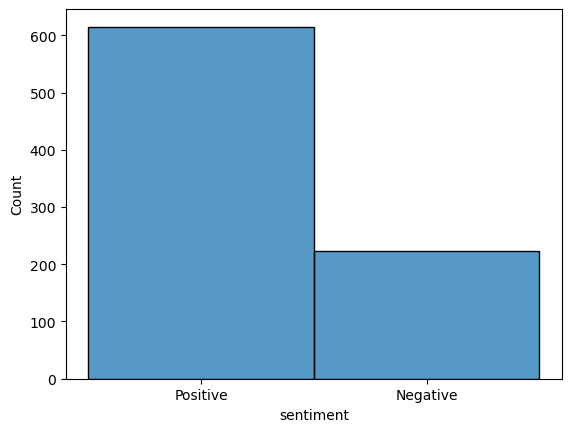

In [63]:
import seaborn as sb
sb.histplot(ddvc.sentiment)

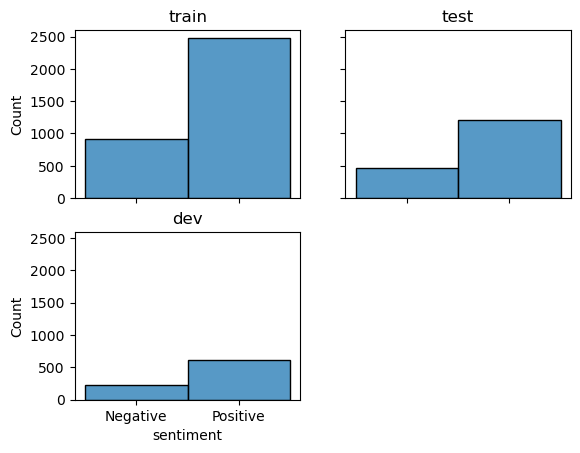

In [65]:
def plot_hist(column:str, xrot:int|float=0):
    f, axs = pp.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
    for ax, d, ttl in zip(axs.ravel(), [dtrc, dtsc, ddvc], ['train', 'test', 'dev']):
        bins = d[column].value_counts().index.size
        sb.histplot(d[column], ax=ax, )
        ax.set_title(ttl)
    axs.ravel()[-1].set_visible(False)

plot_hist('sentiment')

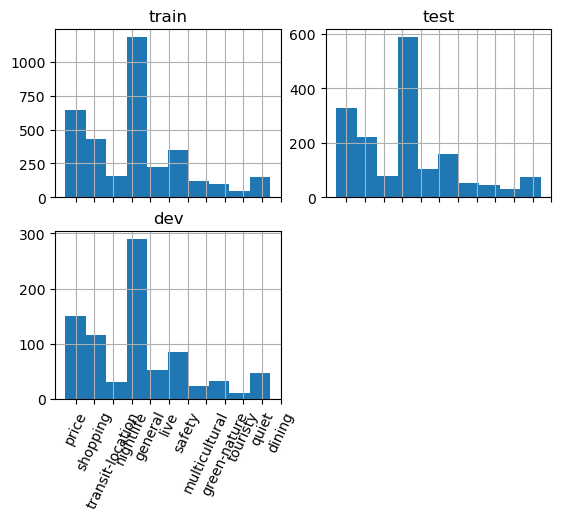

In [50]:
plot_hist(column='aspect', xrot=65)